In [ ]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
import os
import glob as gb
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
import tensorflow as tf
import keras

In [ ]:
train_path='/cnn_img/seg_train/'

In [ ]:
test_path='/cnn_img/seg_test/'

In [ ]:
#path = "/"
#dir_list = os.listdir('/')
# print the list
#print(dir_list)

In [ ]:
for folder in os.listdir(train_path + 'seg_train'):
    file=gb.glob(pathname=str(train_path +'seg_train/' + folder +'/*.jpg'))
    print(f'for training data, found {len(file)} in folder {folder}')

for training data, found 70 in folder buildings
for training data, found 70 in folder forest
for training data, found 70 in folder glacier
for training data, found 60 in folder mountain
for training data, found 90 in folder sea
for training data, found 80 in folder street


In [ ]:
for folder in os.listdir(test_path +'seg_test'):
    file=gb.glob(pathname=str(test_path +'seg_train/' + folder +'/*.jpg'))
    print(f'for training data, found {len(file)} in folder {folder}')

for training data, found 0 in folder buildings
for training data, found 0 in folder forest
for training data, found 0 in folder glacier
for training data, found 0 in folder mountain
for training data, found 0 in folder sea
for training data, found 0 in folder street


In [ ]:
size=[]
for folder in os.listdir(train_path + 'seg_train'):
    file=gb.glob(pathname=str(train_path +'seg_train/' + folder +'/*.jpg'))
    for image in file :
        img=plt.imread(image)
        size.append(img.shape)
pd.Series(size).value_counts()

(150, 150, 3)    438
(113, 150, 3)      1
(140, 150, 3)      1
dtype: int64

In [ ]:
size=[]
for folder in os.listdir(test_path +'seg_test'):
    file=gb.glob(pathname=str(test_path+'seg_test/'+folder+'/*.jpg'))
    for image in file :
        img =plt.imread(image)
        size.append(img.shape)

pd.Series(size).value_counts()


(150, 150, 3)    560
dtype: int64

In [ ]:
code={'buildings':0,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}

def getcode(n):
    for x,y in code.items():
        if n==y:
            return x

In [ ]:
x_train=[]
y_train=[]
for folder in os.listdir(train_path + 'seg_train'):
    file=gb.glob(pathname=str(train_path +'seg_train/' + folder +'/*.jpg'))
    for image in file :
        img=cv2.imread(image)
        resized_img=cv2.resize(img,(100,100))
        x_train.append(resized_img)
        y_train.append(code[folder])

In [ ]:
x_test=[]
y_test=[]
for folder in os.listdir(test_path + 'seg_test'):
    file=gb.glob(pathname=str(test_path +'seg_test/' + folder +'/*.jpg'))
    for image in file :
        img=cv2.imread(image)
        resized_img=cv2.resize(img,(100,100))
        x_test.append(resized_img)
        y_test.append(code[folder])

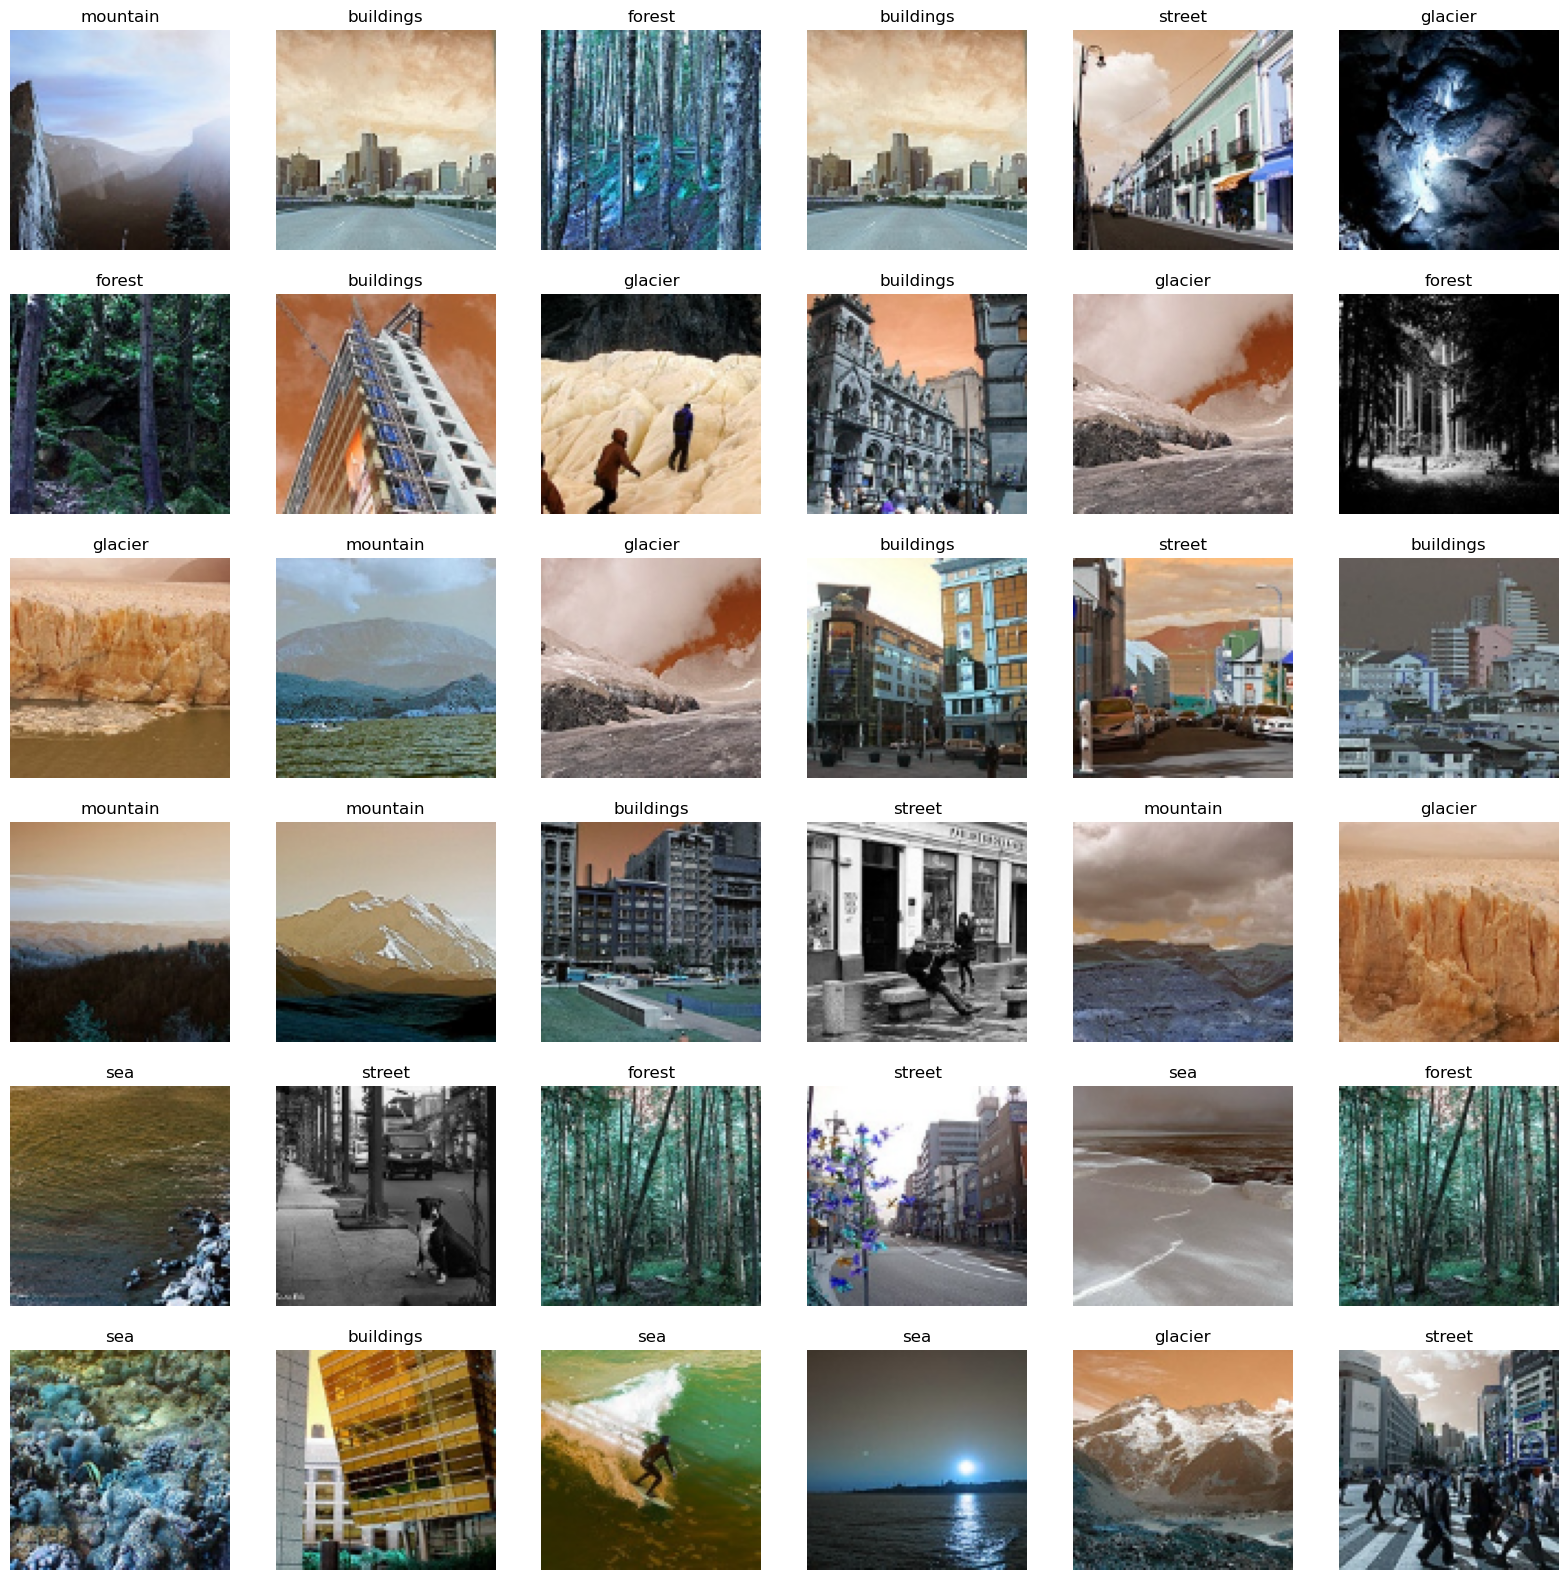

In [ ]:
plt.figure(figsize=(20,20))
for n,i in enumerate(list(np.random.randint(0,len(x_train),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(getcode(y_train[i]))

In [ ]:
x_train=np.array(x_train)
x_test=np.array(x_test)

y_train=np.array(y_train)
y_test=np.array(y_test)

In [ ]:
model=keras.models.Sequential([
    keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(100,100,3)),
    keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(4,4),
    keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu',input_shape=(100,100,3)),
    keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),
    keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
    keras.layers.MaxPool2D(4,4),
    keras.layers.Flatten(),
    keras.layers.Dense(120,activation='relu'),
    keras.layers.Dense(100,activation='relu'),
    keras.layers.Dense(50,activation='relu'),
    keras.layers.Dropout(rate=.2),
    keras.layers.Dense(6,activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 200)       5600      
                                                                 
 conv2d_1 (Conv2D)           (None, 96, 96, 150)       270150    
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 150)       0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 22, 22, 120)       162120    
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 80)        86480     
                                                                 
 conv2d_4 (Conv2D)           (None, 18, 18, 50)        36050     
                                                        

In [ ]:
final_model=model.fit(x_train,y_train,epochs=50,batch_size=64,verbose=1)

Epoch 1/50
7/7 [==============================] - 33s 5s/step - loss: 1.3119 - accuracy: 0.4659
Epoch 2/50
7/7 [==============================] - 36s 5s/step - loss: 1.2757 - accuracy: 0.4318
Epoch 3/50
7/7 [==============================] - 42s 6s/step - loss: 1.2892 - accuracy: 0.4932
Epoch 4/50
7/7 [==============================] - 42s 6s/step - loss: 1.2325 - accuracy: 0.4705
Epoch 5/50
7/7 [==============================] - 42s 6s/step - loss: 1.1222 - accuracy: 0.5545
Epoch 6/50
7/7 [==============================] - 45s 6s/step - loss: 1.0967 - accuracy: 0.5409
Epoch 7/50
7/7 [==============================] - 41s 6s/step - loss: 1.0314 - accuracy: 0.6045
Epoch 8/50
7/7 [==============================] - 42s 6s/step - loss: 1.0786 - accuracy: 0.5750
Epoch 9/50
7/7 [==============================] - 41s 6s/step - loss: 1.0330 - accuracy: 0.5705
Epoch 10/50
7/7 [==============================] - 40s 6s/step - loss: 0.9431 - accuracy: 0.6250
Epoch 11/50
7/7 [======================

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test)

18/18 [==============================] - 10s 581ms/step - loss: 2.4506 - accuracy: 0.5089


In [ ]:
print(f'loss = {loss}')
print(f'accuracy = {accuracy}')

loss = 2.4505879878997803
accuracy = 0.5089285969734192


In [ ]:
y_pred=model.predict(x_test)
classes_y=np.argmax(y_pred,axis=1)

18/18 [==============================] - 13s 744ms/step


In [ ]:
classes_y

array([0, 1, 0, 4, 0, 3, 0, 5, 4, 5, 0, 0, 0, 1, 5, 0, 5, 0, 0, 1, 5, 5,
       0, 5, 5, 0, 3, 0, 4, 5, 3, 5, 0, 0, 5, 0, 0, 0, 0, 3, 0, 5, 1, 0,
       3, 0, 0, 5, 4, 0, 3, 1, 0, 0, 5, 0, 5, 5, 0, 0, 0, 5, 5, 5, 5, 5,
       5, 3, 3, 0, 0, 4, 0, 5, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 5, 5, 0,
       5, 1, 4, 5, 5, 0, 0, 0, 0, 5, 3, 0, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 4, 4, 5, 1, 1, 5, 1, 1, 1, 1, 1, 1, 1, 1, 5, 4, 1, 1, 1, 1, 1,
       1, 5, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 1, 0, 1, 5, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 4, 3, 2, 5, 4, 2, 4, 0, 0, 4, 4, 4, 4, 4, 2, 2,
       2, 2, 4, 4, 4, 4, 5, 5, 0, 2, 4, 2, 2, 3, 4, 2, 4, 1, 2, 5, 4, 1,
       2, 2, 4, 2, 4, 3, 2, 4, 3, 4, 5, 5, 3, 2, 5, 4, 5, 2, 2, 5, 2, 2,
       4, 2, 0, 2, 2, 5, 5, 0, 2, 4, 2, 2, 4, 2, 4, 2, 4, 5, 5, 2, 2, 5,
       4, 4, 5, 4, 0, 0, 4, 3, 3, 3, 4, 3, 5, 4, 4, 3, 0, 4, 4, 3, 0, 2,
       2, 3, 5, 3, 3, 3, 4, 3, 3, 3, 4, 4, 4, 0, 3,

In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,

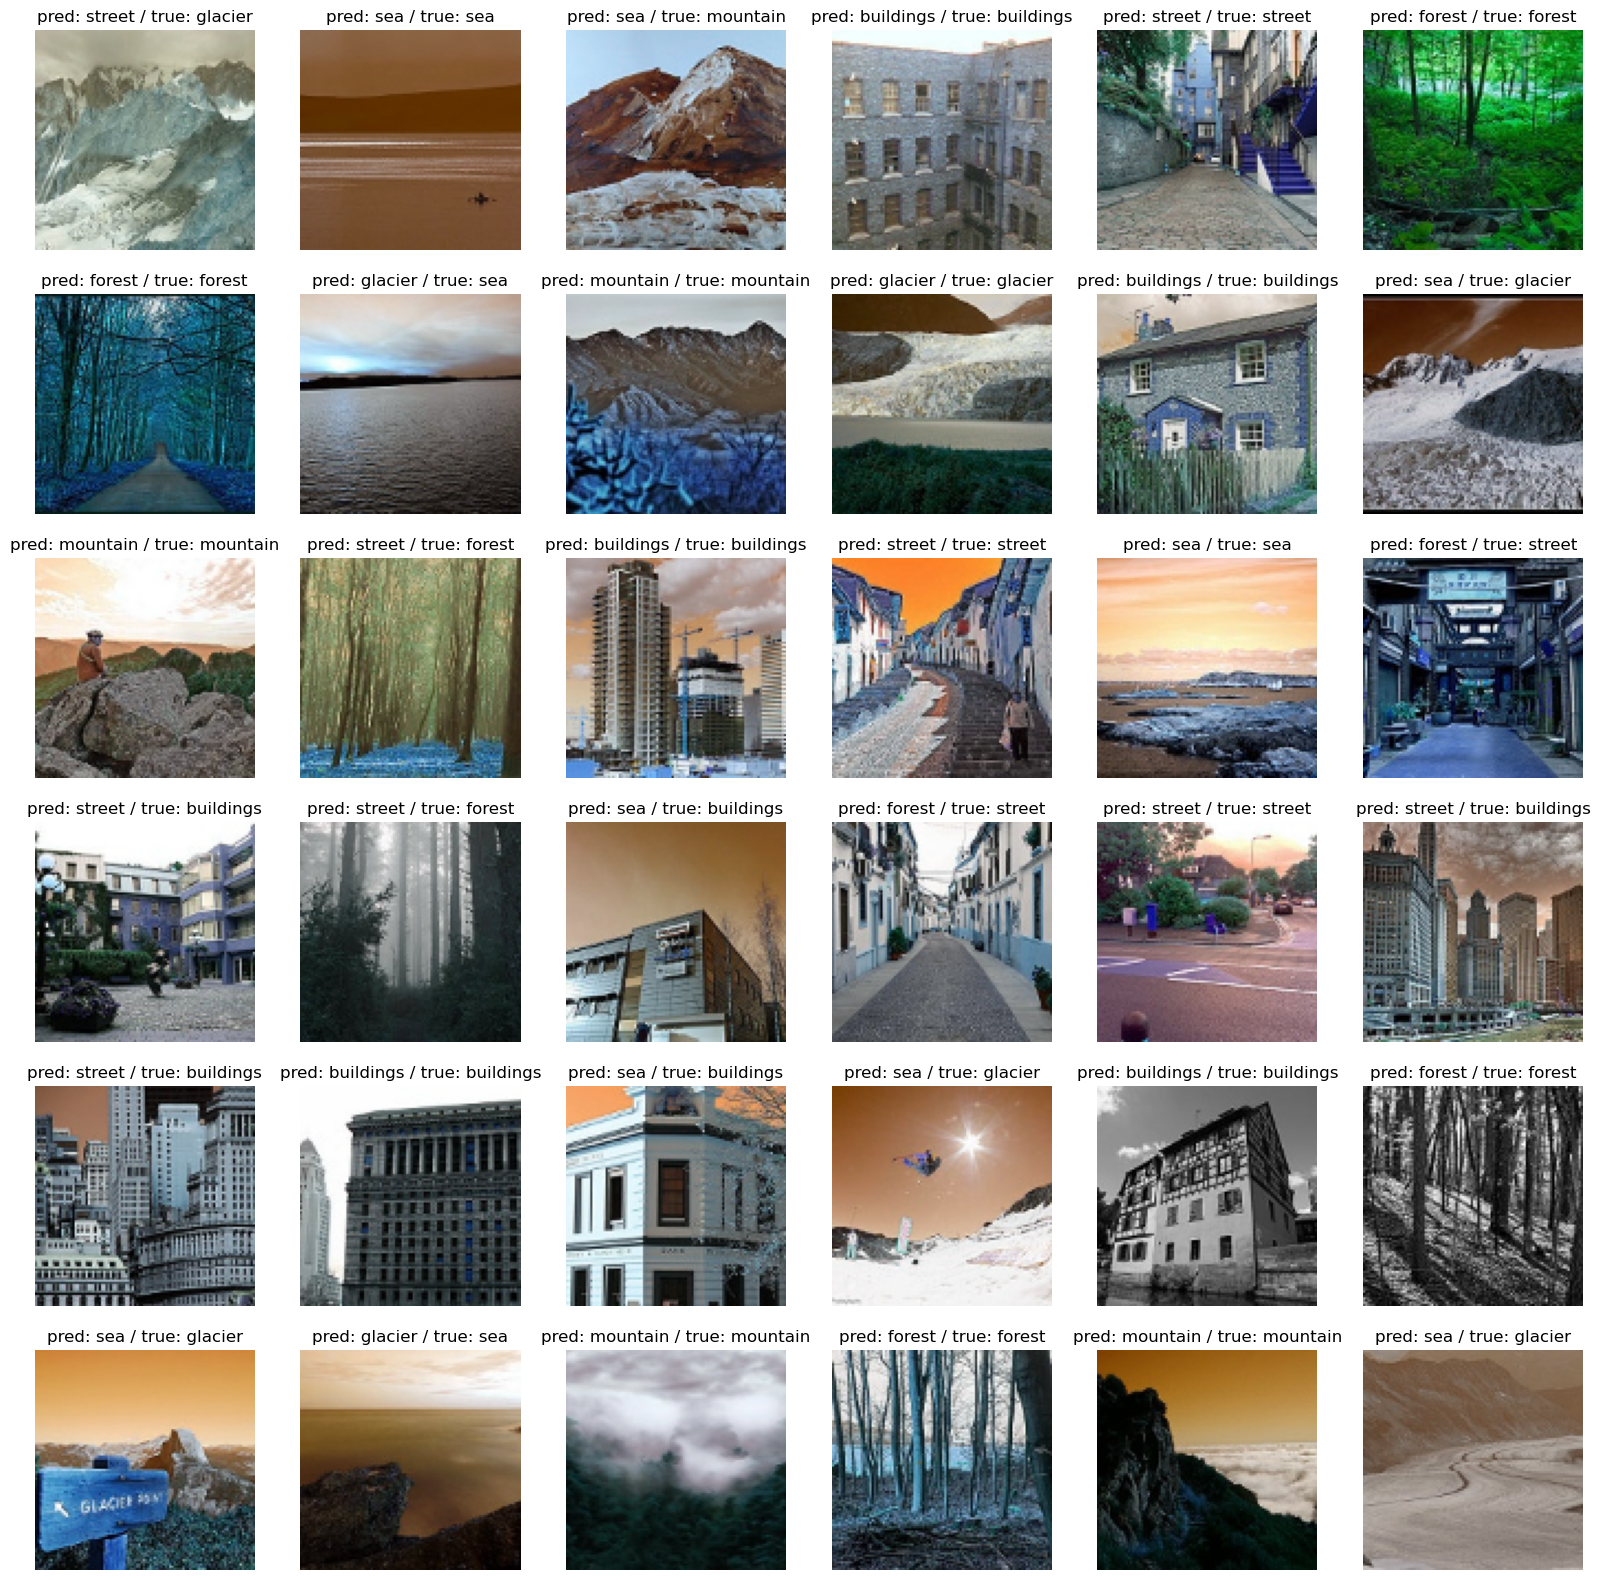

In [ ]:

plt.figure(figsize=(20,20))
for n,i in enumerate(list(np.random.randint(0,len(x_test),36))):
    plt.subplot(6,6,n+1)
    plt.imshow(x_test[i])
    plt.axis('off')
    plt.title('pred: '+getcode(classes_y[i])+" / true: " + getcode(y_test[i]))